<a href="https://colab.research.google.com/github/sathishk951/sathishk951-ZOMATO-RESTAURANT-CLUSTERING-AND-SENTIMENT-ANALYSIS/blob/main/ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
from datetime import datetime

import warnings    
warnings.filterwarnings('ignore')

In [ ]:
names_df=pd.read_csv("/content/drive/MyDrive/project/unsupervised/zomato/Copy of Zomato Restaurant names and Metadata.csv")
review_df=pd.read_csv("/content/drive/MyDrive/project/unsupervised/zomato/Copy of Zomato Restaurant reviews.csv")

In [ ]:
names_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [ ]:
names_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [ ]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [ ]:
names_df[names_df['Collections'].isnull()].head()

,Name,Links,Cost,Collections,Cuisines,Timings
7,Shah Ghouse Spl Shawarma,https://www.zomato.com/hyderabad/shah-ghouse-s...,300,NaN,Lebanese,12 Noon to 12 Midnight
15,KFC,https://www.zomato.com/hyderabad/kfc-gachibowli,500,NaN,"Burger, Fast Food",11 AM to 11 PM
16,NorFest - The Dhaba,https://www.zomato.com/hyderabad/norfest-the-d...,550,NaN,North Indian,12 Noon to 10:30 PM
17,Hotel Zara Hi-Fi,https://www.zomato.com/hyderabad/hotel-zara-ga...,400,NaN,"Chinese, North Indian",11:30 AM to 1 AM
23,Amul,https://www.zomato.com/hyderabad/amul-gachibowli,150,NaN,"Ice Cream, Desserts",10 AM to 5 AM


In [ ]:
# Checking duplicate rows in dataset
names_df.duplicated(keep='last').sum()
    

0

In [ ]:
# Changing cost function's data type
names_df['Cost'] = names_df['Cost'].str.replace(",","").astype('int64')

In [ ]:
#exploring null rows in reviews column
review_df[review_df['Review'].isnull()].head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
2360,Amul,Lakshmi Narayana,NaN,5,0 Reviews,7/29/2018 18:00,0
5799,Being Hungry,Surya,NaN,5,"4 Reviews , 4 Followers",7/19/2018 23:55,0
6449,Hyderabad Chefs,Madhurimanne97,NaN,5,1 Review,7/23/2018 16:29,0
6489,Hyderabad Chefs,Harsha,NaN,5,1 Review,7/8/2018 21:19,0
7954,Olive Garden,ARUGULLA PRAVEEN KUMAR,NaN,3,"1 Review , 1 Follower",8/9/2018 23:25,0


**"Review"** column has text that needs to be analyzed to understand the sentiments and without it, the analysis cannot be done. 

It can also be seen that most of the null values in the review column also have nulls in other corresponding columns such as Reviewer, Rating, Metadata, and Time. These instances should be dropped.

In [ ]:
#dropping null rows in reviews first
review_df.dropna(subset = ["Review"], inplace=True)

In [ ]:
review_df['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like'],
      dtype=object)

In [ ]:
#like should not be there,so correcting and changing the datatype
review_df['Rating'] = review_df['Rating'].replace('Like','4').astype('float')

Here there is like in rating we cannot have strings.So it is replaced with 4 and the column is converted into float

# **Zomato Restaurant names and Metadata**


First, the restaurants dataset has columns such as Links, Cuisine, and Timings which cant interpret directly. 

The location of the restaurant can be extracted by the Links column. 

Cuisines can be clubbed and categorized into a few categories and a total number of cuisines served by a particular restaurant. .

In [ ]:
# link value
names_df['Links'].head()

0    https://www.zomato.com/hyderabad/beyond-flavou...
1    https://www.zomato.com/hyderabad/paradise-gach...
2    https://www.zomato.com/hyderabad/flechazo-gach...
3    https://www.zomato.com/hyderabad/shah-ghouse-h...
4    https://www.zomato.com/hyderabad/over-the-moon...
Name: Links, dtype: object

In [ ]:
#function to extract location of the restaurant
def location(link):
  link_elements = link.split("/")
  return link_elements[3]

#create a location feature
names_df['Location'] = names_df['Links'].apply(location)

In [ ]:
names_df['Location'].unique()

array(['hyderabad', 'thetiltbarrepublic'], dtype=object)

We can see the restaurant are located in hyderabad

one more location is there 'thetiltbarrepublic',we have to explore it.

In [ ]:
# exploring the other value
names_df[names_df.isin(['thetiltbarrepublic'])].stack()

68  Location    thetiltbarrepublic
dtype: object

 thetiltbarrepublic does not give any location to the dataset.So we can drop it

In [ ]:
#dropping unnecessary columns
names_df.drop(['Links','Location'],axis=1,inplace=True)

In [ ]:
#let's drop time as it would not be required
review_df.drop(['Time'],axis=1,inplace=True)

In [ ]:
#splitting to create list instead of strings
names_df['Cuisines'] = names_df['Cuisines'].apply(lambda x : x.split(','))

#creating a list of all cuisine lists for different restaurants
cuisine_list = []
for idx in names_df.index:
  cuisine_list.append(names_df['Cuisines'][idx])

#creating a flat list
cuisine_list = [item for sublist in cuisine_list for item in sublist]

In [ ]:
#frequency dict
frequency_dict = {}
for elem in cuisine_list:
  if elem not in frequency_dict.keys():
    frequency_dict[elem] = cuisine_list.count(elem)
  else:
    pass

#frequency dictionary
frequency_dict

{'Chinese': 7,
 ' Continental': 17,
 ' Kebab': 5,
 ' European': 2,
 ' South Indian': 7,
 ' North Indian': 28,
 'Biryani': 4,
 ' Chinese': 36,
 'Asian': 5,
 ' Mediterranean': 4,
 ' Desserts': 11,
 ' Seafood': 3,
 ' Beverages': 5,
 'Seafood': 1,
 ' Goan': 1,
 ' Asian': 10,
 'Healthy Food': 1,
 'Lebanese': 1,
 'American': 4,
 'Ice Cream': 2,
 'Street Food': 2,
 ' Fast Food': 10,
 'Mediterranean': 1,
 ' BBQ': 1,
 'Continental': 4,
 ' American': 2,
 'North Indian': 33,
 ' Italian': 12,
 ' Finger Food': 1,
 'European': 2,
 'Burger': 2,
 ' Biryani': 12,
 ' Japanese': 2,
 ' Salad': 5,
 ' Sushi': 4,
 'Mexican': 1,
 'Mughlai': 1,
 'Fast Food': 5,
 'Andhra': 3,
 'Bakery': 6,
 ' Mughlai': 5,
 ' Juices': 1,
 'Arabian': 1,
 'Italian': 2,
 ' Andhra': 3,
 ' Hyderabadi': 3,
 'Cafe': 5,
 ' Spanish': 1,
 ' Wraps': 1,
 'Finger Food': 1,
 ' Thai': 2,
 ' Indonesian': 1,
 'South Indian': 2,
 ' Bakery': 1,
 'Modern Indian': 1,
 'Desserts': 2,
 'Kebab': 1,
 ' Momos': 3,
 'BBQ': 1,
 ' Modern Indian': 1,
 ' Burg

It is observed that many of the cuisines has an extra space added at the beginning of the string. 

For example, there are two categories for North Indian food - 'North Indian' and ' North Indian'.

Another point to note is there are various unnecessary categories made. For example, there are 'Chinese' and ' Momos' both in the dataset as different cuisines. Let's try to club and correct them.

In [ ]:
#minimising the number of cuisines by sorting and categorizing them out
cuisine_dict = {'Chinese':['Chinese',' Chinese','Momos',' Momos'],'North Indian':['North Indian',' North Indian',' BBQ','BBQ',' Biryani','Biryani','Kebab',' Kebab'],'Continental':['Continental',' Continental',' American','American',' BBQ','BBQ','Burger',' Burger','Finger Food',' Finger Food', ' Juices',' Pizza',' Salad',' Wraps'],
                'Andhra':['Andhra',' Andhra'],'Arabian':['Arabian',' Arabian'],'Asian': ['Asian',' Asian'],'Bakery':['Bakery',' Bakery'],
                'Beverages':['Beverages',' Beverages'],'Cafe':['Cafe',' Cafe'],'Desserts':['Desserts',' Desserts',' Mithai','Ice Cream'],
                'European':['European',' European',' Spanish'],'Fast Food':['Fast Food',' Fast Food','Burger',' Burger'],'Goan':[' Goan',' Goan'],
                'Hyderabadi':['Hyderabadi',' Hyderabadi',' Biryani','Biryani'],'Indonesian':['Indonesian',' Indonesian'],'Italian':['Italian',' Italian',' Pizza'],
                'Japanese':['Japanese',' Japanese',' Sushi'],'Malaysian':['Malaysian',' Malaysian'],'Mediterranean':['Mediterranean',' Mediterranean'],
                'Modern Indian':['Modern Indian',' Modern Indian',' Salad'],'Mughlai':['Mughlai',' Mughlai',' BBQ','BBQ','Kebab',' Kebab'],
                'Seafood':['Seafood',' Seafood'],'South Indian':['South Indian',' South Indian'],
                'Thai':['Thai',' Thai'],'Healthy Food':['Healthy Food'],'Lebanese':['Lebanese'],'Mexican':['Mexican'],'North Eastern':['North Eastern'],
                'Street Food':['Street Food']}

In [ ]:
names_cor_df = names_df.copy()

In [ ]:
#the function returns a list of error free and mapped cuisines according to the dictionary created
def cuisine_corrector(cuisine):
  list1 = []
  # for every cuisine in the list of a particular row
  for elem in cuisine:
    # and for every key value in the dict
    for key,value in cuisine_dict.items():
      # if cuisine is correct and matches with one of the unique keys we append to the list and break
      if elem == key:
        list1.append(key)
        break
      # next if the other elem doesnot match if search and value and append the key for that value
      if elem in value:
        list1.append(key)
      
  return list(set(list1)) # returns a unique cuisines list
     

In [ ]:
#correcting and getting the desired lists as row values for cuisines column
names_cor_df['Cuisines']=names_cor_df['Cuisines'].apply(cuisine_corrector)

In [ ]:
names_cor_df['Cuisines'].head()

0    [Continental, Chinese, South Indian, North Ind...
1                  [Hyderabadi, North Indian, Chinese]
2       [Mediterranean, North Indian, Asian, Desserts]
3    [Seafood, Chinese, Hyderabadi, North Indian, B...
4    [Mediterranean, Continental, Chinese, Asian, N...
Name: Cuisines, dtype: object

The next step is to create column features for the unique cuisines and assign values according to the row values available.

In [ ]:
# concatenate new columns with the dataset
names_cor_df = pd.concat([names_cor_df,pd.DataFrame(columns=list(cuisine_dict.keys()))])

In [ ]:
# iterating for every row in the dataframe
for i, row in names_cor_df.iterrows():
  # and for every row we iterate over the new columns only
  for column in list(names_cor_df.columns):
      if column not in ['Name','Cost','Cuisines','Timings']:
        # and check if the column is in the list of cuisines available for that row
        if column in row['Cuisines']:
          #then assign it as 1 else 0
          names_cor_df.loc[i,column] = 1
        else:
          names_cor_df.loc[i,column] = 0

In [ ]:
names_cor_df.head()

,Name,Cost,Collections,Cuisines,Timings,Chinese,North Indian,Continental,Andhra,Arabian,...,Modern Indian,Mughlai,Seafood,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food
0,Beyond Flavours,800.0,0,"[Continental, Chinese, South Indian, North Ind...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",1,1,1,0,0,...,0,1,0,1,0,0,0,0,0,0
1,Paradise,800.0,0,"[Hyderabadi, North Indian, Chinese]",11 AM to 11 PM,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Flechazo,1300.0,0,"[Mediterranean, North Indian, Asian, Desserts]","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Shah Ghouse Hotel & Restaurant,800.0,0,"[Seafood, Chinese, Hyderabadi, North Indian, B...",12 Noon to 2 AM,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Over The Moon Brew Company,1200.0,0,"[Mediterranean, Continental, Chinese, Asian, N...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...",1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#creating a new column for the total number of cusines served by restaurants
names_cor_df['Total Cuisines'] = names_cor_df['Cuisines'].apply(lambda x : len(x))

In [ ]:
names_cor_df.head(5)

,Name,Cost,Collections,Cuisines,Timings,Chinese,North Indian,Continental,Andhra,Arabian,...,Mughlai,Seafood,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food,Total Cuisines
0,Beyond Flavours,800.0,0,"[Continental, Chinese, South Indian, North Ind...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",1,1,1,0,0,...,1,0,1,0,0,0,0,0,0,6
1,Paradise,800.0,0,"[Hyderabadi, North Indian, Chinese]",11 AM to 11 PM,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,Flechazo,1300.0,0,"[Mediterranean, North Indian, Asian, Desserts]","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,Shah Ghouse Hotel & Restaurant,800.0,0,"[Seafood, Chinese, Hyderabadi, North Indian, B...",12 Noon to 2 AM,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,5
4,Over The Moon Brew Company,1200.0,0,"[Mediterranean, Continental, Chinese, Asian, N...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...",1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,5


In [ ]:
#drop cuisines column
names_cor_df.drop(['Cuisines'],axis=1,inplace=True)

In [ ]:
#drop timings
names_cor_df.drop(['Timings'],axis=1,inplace=True)

The restaurants are more or less open at the same timings and don't really provide a considerable variation in order to time cluster the restaurants.

In [ ]:
# groupby restaurant and ratings to get average ratings
restaurant_ratings = review_df.groupby('Restaurant')['Rating'].mean().reset_index()
restaurant_ratings.rename(columns={'Restaurant':'Name'},inplace=True)
#sort restaurants according to ratings and getting top 5 restaurants
restaurant_ratings.sort_values(by='Rating',ascending = False).head()

,Name,Rating
3,AB's - Absolute Barbecues,4.88
11,B-Dubs,4.81
2,"3B's - Buddies, Bar & Barbecue",4.76
67,Paradise,4.70
35,Flechazo,4.66


In [ ]:
#adding an average rating feature in restaurant names and metadata dataframe
names_cor_df= names_cor_df.merge(restaurant_ratings,on='Name',how='left')
names_cor_df.rename(columns={'Rating':'Avg Rating'},inplace=True)
names_cor_df.head(3)

,Name,Cost,Collections,Chinese,North Indian,Continental,Andhra,Arabian,Asian,Bakery,...,Seafood,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food,Total Cuisines,Avg Rating
0,Beyond Flavours,800.0,0,1,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,6,4.28
1,Paradise,800.0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,4.70
2,Flechazo,1300.0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,4,4.66


In [ ]:
names_cor_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            105 non-null    object 
 1   Cost            105 non-null    float64
 2   Collections     105 non-null    object 
 3   Chinese         105 non-null    object 
 4   North Indian    105 non-null    object 
 5   Continental     105 non-null    object 
 6   Andhra          105 non-null    object 
 7   Arabian         105 non-null    object 
 8   Asian           105 non-null    object 
 9   Bakery          105 non-null    object 
 10  Beverages       105 non-null    object 
 11  Cafe            105 non-null    object 
 12  Desserts        105 non-null    object 
 13  European        105 non-null    object 
 14  Fast Food       105 non-null    object 
 15  Goan            105 non-null    object 
 16  Hyderabadi      105 non-null    object 
 17  Indonesian      105 non-null    obj

As we can see Avg rating has 5 null value.So it can be replace with 0

In [ ]:
#five restaurants have not been rated by people yet
names_cor_df['Avg Rating'].fillna(0,inplace=True)

# **Zomato Restaurant Review**

In [ ]:
review_df.head(3)

,Restaurant,Reviewer,Review,Rating,Metadata,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",0


In [ ]:
# splitting meta data into review and follower seperately
review_df['Reviews'], review_df['Followers'] = review_df['Metadata'].str.split(',').str
review_df['Reviews'] = pd.to_numeric(review_df['Reviews'].str.split(' ').str[0])
review_df['Followers'] = pd.to_numeric(review_df['Followers'].str.split(' ').str[1])

review_df.head(3)

,Restaurant,Reviewer,Review,Rating,Metadata,Pictures,Reviews,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",0,1,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",0,3,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",0,2,3.0


In [ ]:
#drop Metadata
review_df.drop(['Metadata'],axis=1,inplace=True)

In [ ]:
#create a seperate detaframe for reviewers and their activity
reviewers_df = review_df.groupby(['Reviewer','Reviews','Followers'])['Rating'].mean().reset_index()
reviewers_df.sort_values(by=['Reviews','Followers','Rating'],ascending=[False,False,True],inplace=True,ignore_index=True)

#sorting out the crtics of the industry, these are the people with most reviews written and most followers who have given low rating on an avg
reviewers_df.head(3)

,Reviewer,Reviews,Followers,Rating
0,Anvesh Chowdary,1031,1654.0,3.333333
1,ᴀɴ.ᴏᴛʜᴇʀ.sᴇɴ,685,794.0,2.000000
2,Abc098,665,2275.0,3.000000


# **Exploratory Data Analysis**

**1.Best Restaurants in the City**

In [ ]:
# sorting out the best restaurants
best_restaurants = names_cor_df[['Name','Avg Rating','Total Cuisines','Cost']]
best_restaurants.sort_values(by=['Avg Rating','Total Cuisines','Cost'],ascending=[False,False,True],inplace=True,ignore_index=True)
#top10
best_restaurants = best_restaurants.loc[0:9,:]
best_restaurants

,Name,Avg Rating,Total Cuisines,Cost
0,AB's - Absolute Barbecues,4.88,3,1500.0
1,B-Dubs,4.81,1,1600.0
2,"3B's - Buddies, Bar & Barbecue",4.76,3,1100.0
3,Paradise,4.70,3,800.0
4,Flechazo,4.66,4,1300.0
5,The Indi Grill,4.60,5,1500.0
6,Zega - Sheraton Hyderabad Hotel,4.45,2,1750.0
7,Over The Moon Brew Company,4.34,5,1200.0
8,Beyond Flavours,4.28,6,800.0
9,Cascade - Radisson Hyderabad Hitec City,4.26,4,1800.0


Text(0.5, 1.0, 'Best Restaurants in Hyderabad')

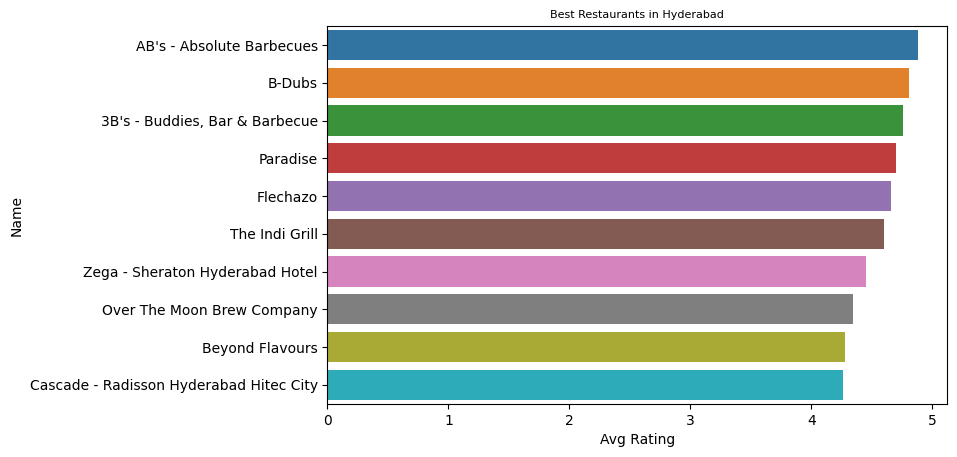

In [ ]:
sns.barplot(x='Avg Rating', y='Name',data=best_restaurants)
plt.title('Best Restaurants in Hyderabad',size=8)

From the plot we can visulise AB's - Absolute Barbecues	has the highest rating and Cascade - Radisson Hyderabad Hitec City has the lowest

**2.Top Expensive Restaurant**

In [ ]:
top_10_costly_rest=names_cor_df[['Name','Cost']].groupby('Name',as_index=False).sum().sort_values(by='Cost',ascending=False).head(10)

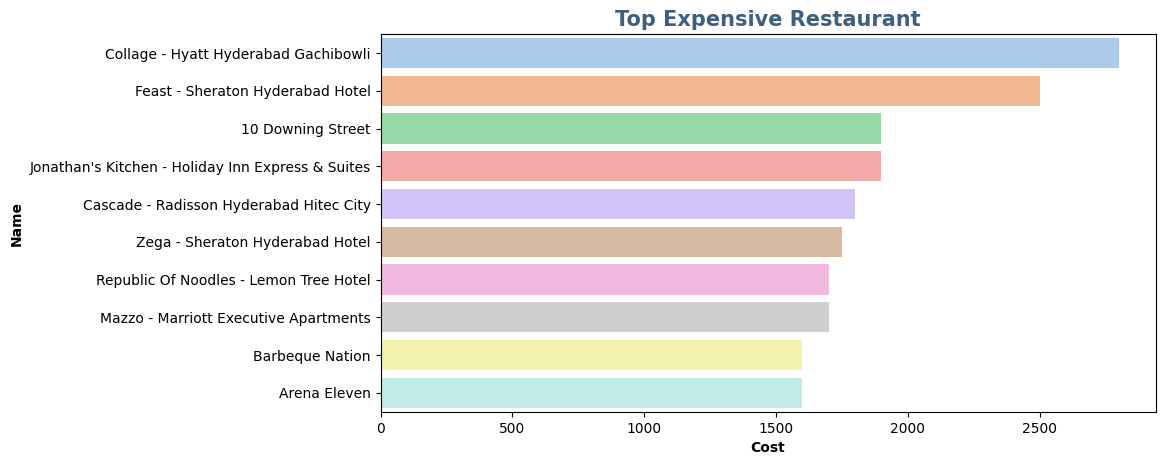

In [ ]:
plt.figure(figsize=(10,5))
x = top_10_costly_rest['Cost']
y = top_10_costly_rest['Name']
plt.title("Top Expensive Restaurant",fontsize=15,weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=10)
plt.xlabel("Cost",weight='bold',fontsize=10)
sns.barplot(x=x, y=y,palette='pastel')
plt.show()

From this plot we can see that collage-Hyatt hyderabad was most expensive and arena eleven is cheep

**3.Distribution of Average Restaurant Ratings**

Text(0.5, 1.0, 'Distribution of Average Restaurant Ratings in Hyderabad')

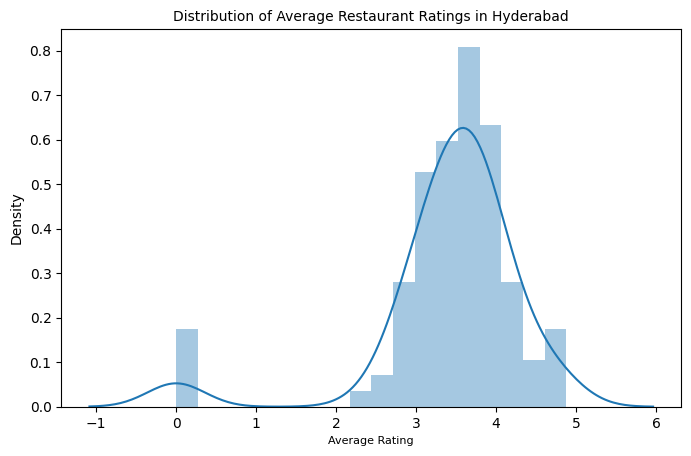

In [ ]:
#distribution of Average Ratings in Hyderabad
sns.distplot(x=names_cor_df['Avg Rating'])
plt.xlabel('Average Rating',size=8)
plt.title('Distribution of Average Restaurant Ratings in Hyderabad',size=10)

Few restaurants in dataset have not been rated by the people yet, most restaurants have ratings between 3.5 and 4. Efforts should be made by the company to improve the existing restaurants by pushing them to act on the reviews and to include restaurants with better services in the future to improve overall rating distribution

**4.Top Affordable Restaurant**

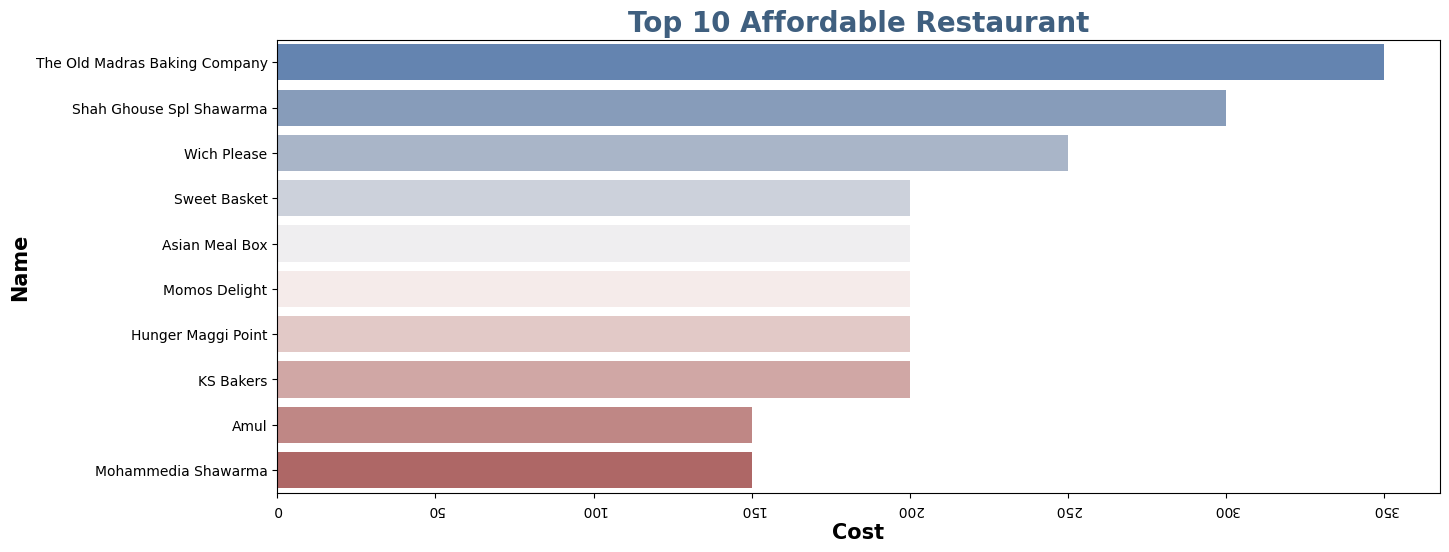

In [ ]:
# Affordable price restaurants
plt.figure(figsize=(15,6))
top_10_affor_rest=names_cor_df[['Name','Cost']].groupby('Name',as_index=False).sum().sort_values(by='Cost',ascending=False).tail(10)
x = top_10_affor_rest['Cost']
y = top_10_affor_rest['Name']
plt.title("Top 10 Affordable Restaurant",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("Cost",weight='bold',fontsize=15)
plt.xticks(rotation=180)
sns.barplot(x=x, y=y,palette='vlag')
plt.show()

From the plot we can conclude Old madras banking company is the top affordable resturant

**5.The Most Popular Cuisines in Hyderabad**

In [ ]:
#creating a new dataframe for the cuisines and number of restaurants providing them
#list of cuisines
cuisines1 = list(cuisine_dict.keys())
#creating a new dataframe
popular_cuisines = pd.DataFrame()
#creating a feature called cuisines and assigning unique cuisines as values
popular_cuisines['Cuisines'] = cuisines1
#creating a feature of sum of cuisines in the whole dataset
popular_cuisines['Total Restaurants'] = [names_cor_df[i].sum() for i in cuisines1]
#sort values
popular_cuisines.sort_values('Total Restaurants',ascending=False,inplace=True,ignore_index=True)

Text(0.5, 1.0, 'The Most Popular Cuisines in Hyderabad')

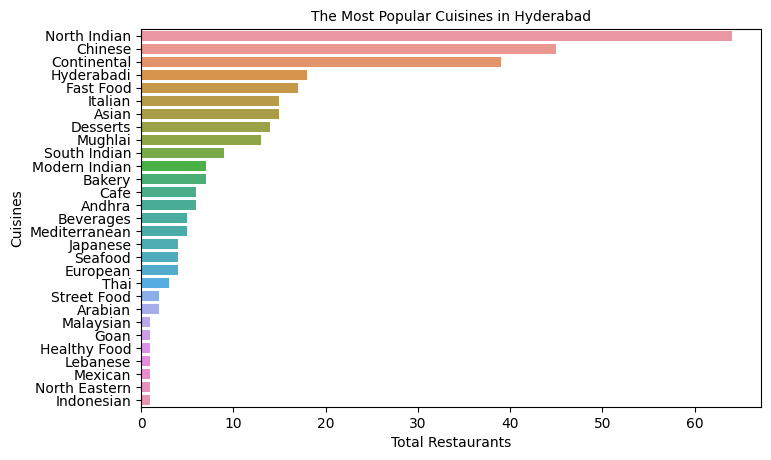

In [ ]:
sns.barplot(x='Total Restaurants', y='Cuisines',data=popular_cuisines)
plt.title('The Most Popular Cuisines in Hyderabad',size=10)

North Indian food is dominating in the restaurants followed by Chinese, and Continental. The number of cuisines shows the diverse food options available in Hyderabad.

**6.Low rating cusinies**

In [ ]:
# filtering out the restaurants with avg rating less than 3 and sorting them out acc to high cost
low_rating_df = names_cor_df[names_cor_df['Avg Rating'] < 3].sort_values(['Avg Rating', 'Cost'],ascending=[True,False],ignore_index=True)
low_rating_df.head(1)

,Name,Cost,Collections,Chinese,North Indian,Continental,Andhra,Arabian,Asian,Bakery,...,Seafood,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food,Total Cuisines,Avg Rating
0,Republic Of Noodles - Lemon Tree Hotel,1700.0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,4,0.0


In [ ]:
#drop restaurants that were not rated
low_rating_df =low_rating_df[low_rating_df['Avg Rating'] != 0].reset_index(drop=True)
low_rating_df.head(3)

,Name,Cost,Collections,Chinese,North Indian,Continental,Andhra,Arabian,Asian,Bakery,...,Seafood,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food,Total Cuisines,Avg Rating
0,Hotel Zara Hi-Fi,400.0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2.40
1,Asian Meal Box,200.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,2.58
2,Pakwaan Grand,400.0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,2.71


Text(0.5, 1.0, 'The Cuisines in Restaurants with Low Ratings')

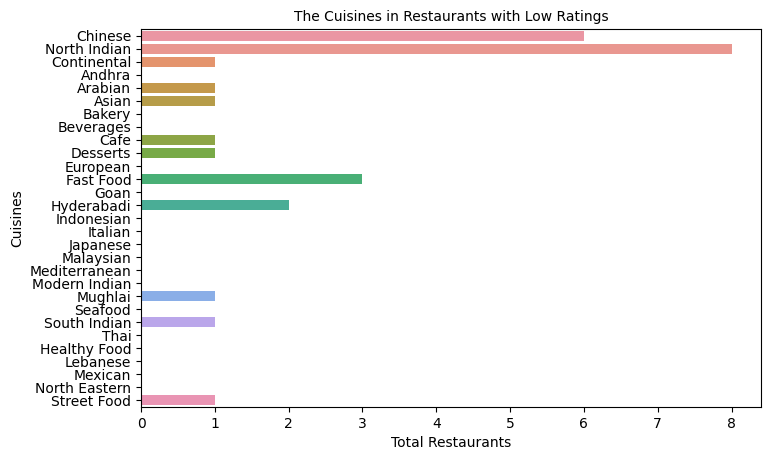

In [ ]:
df_lr = pd.DataFrame()
df_lr['Cuisines'] = cuisines1
df_lr['Total Restaurants'] = [low_rating_df[i].sum() for i in cuisines1]
#visualizing cuisines
sns.barplot(x='Total Restaurants', y='Cuisines',data=df_lr)
plt.title(f'The Cuisines in Restaurants with Low Ratings',size=10)

Here North indian cusinies are rated low 

**7.Restaurants with Low Ratings**

Text(0.5, 1.0, 'Restaurants with Low Ratings')

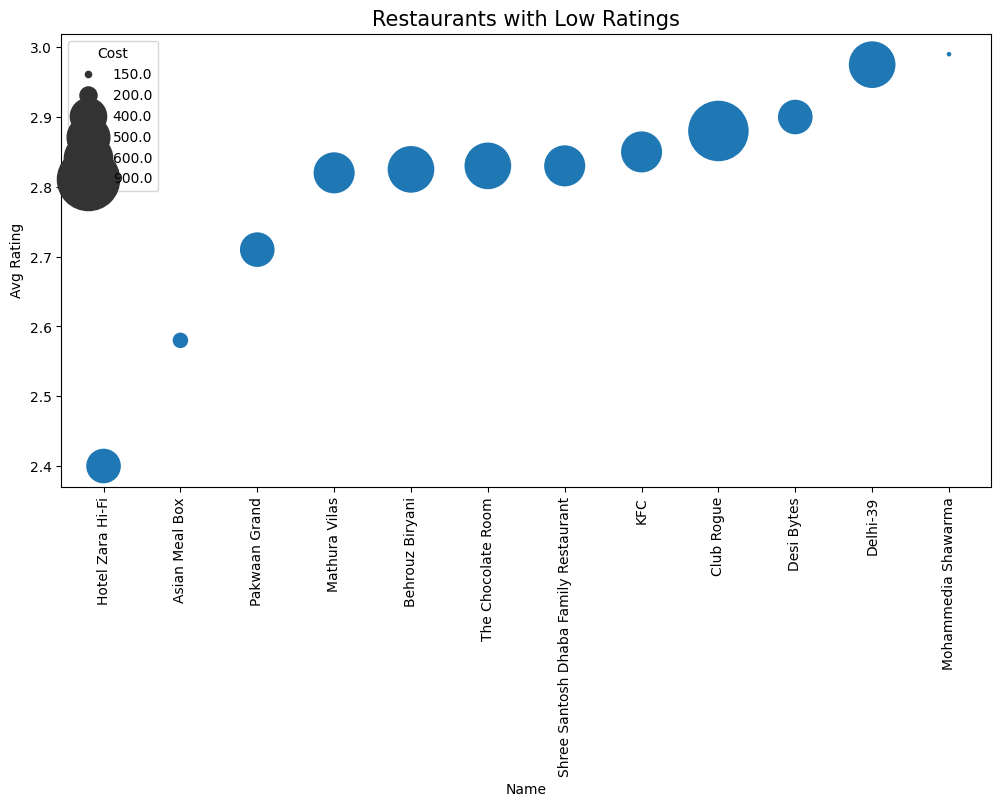

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=low_rating_df, x="Name", y="Avg Rating", size="Cost",alpha=1, legend=True, sizes=(20, 2000))
plt.xticks(rotation=90)
plt.title('Restaurants with Low Ratings',size=15)

These restaurants are basically small food joints or restaurants with high prices according to the food they are serving. Efforts should be made to advertise more and analyze the reviews, especially for these restaurants, and work on them. Mohammedia Shawarma has the highest rating with the lowest cost. It seems it is doing well in its capacity.

# **# Restaurant Clustering**

In [ ]:
#importing minmax scaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#fitting numerical columns
numerical_cols = ['Cost','Total Cuisines','Avg Rating']
scaler = MinMaxScaler()
scaler.fit(names_cor_df[numerical_cols])
scaled_df = names_cor_df.copy()
scaled_df[numerical_cols] = scaler.transform(names_cor_df[numerical_cols])
     

In [ ]:
#setting name as index for both datasets
names_cor_df['Index'] = list(range(0,105))
names_cor_df.set_index(['Index','Name'],inplace=True)
scaled_df['Index'] = list(range(0,105))
scaled_df.set_index(['Index','Name'],inplace=True)

**Kmeans Clustering on Cost and Rating**

In [ ]:
#importing kmeans
from sklearn.cluster import KMeans

In [ ]:
#Within Cluster Sum of Squared Errors for different values of k
#let's first take two variables only 
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(scaled_df[['Cost','Avg Rating']])
    wcss.append(km.inertia_)

Text(0, 0.5, 'WCSS')

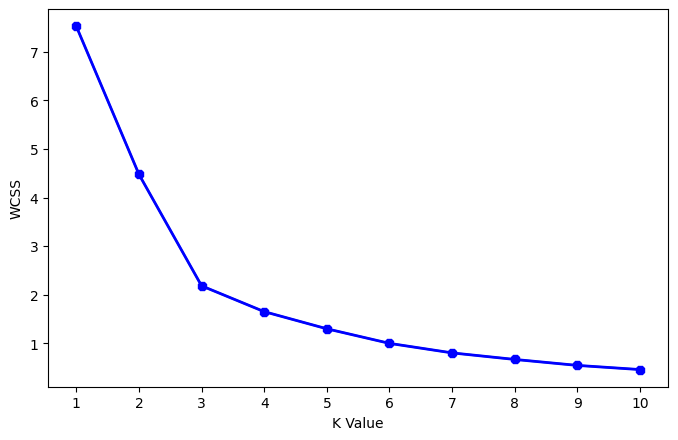

In [ ]:
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="blue", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
     

From the above plot optimal number of clusters here would be 3-5. So, we can assume that after 5 there is minimal drop in WCSS. Let's go ahead and model for 5 clusters.

In [ ]:
#create a copy
kmeans_df1 = scaled_df.copy()

In [ ]:
#fit predict kmeans on 5 clusters
model1 = KMeans(n_clusters=5,random_state= 42)
pred_1 = model1.fit_predict(kmeans_df1[['Cost', 'Avg Rating']])
kmeans_df1["label"] = pred_1

Text(0.5, 1.0, 'Cost vs Average Rating')

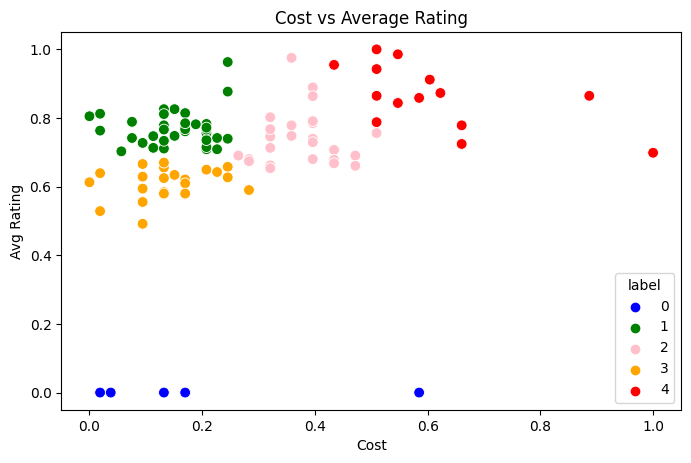

In [ ]:
#Scatterplot of the clusters
sns.scatterplot(x = 'Cost',y = 'Avg Rating',hue="label",  
                 palette=['blue','green','pink','orange','red'], legend='full',data = kmeans_df1  ,s = 60 )
plt.xlabel('Cost')
plt.ylabel('Avg Rating') 
plt.title('Cost vs Average Rating')

I observe there is no linear relation between price and rating. For instance, Restaurants with good rating (like 4–5) have restaurants with all the price range and spread across the entire X axis

The clusters are seperated from each other. Since the input variables were just two, it is easier to distinguish and interpret them.

Label 0 are the restaurant that were in the names dataset but not reviewed.

Label 1 are the restaurants that have good ratings with low pricing.

Label 2 are fine dining restaurants with good ratings and average pricing.

Label 3 restaurants are small food joints with low pricing but had average ratings.

Label 4 are expensive restaurants that also had above-average ratings.

In [ ]:
cluster_0 = kmeans_df1[kmeans_df1['label'] == 0].reset_index()
cluster_1 = kmeans_df1[kmeans_df1['label'] == 1].reset_index()
cluster_2 = kmeans_df1[kmeans_df1['label'] == 2].reset_index()
cluster_3 = kmeans_df1[kmeans_df1['label'] == 3].reset_index()
cluster_4 = kmeans_df1[kmeans_df1['label'] == 4].reset_index()

In [ ]:
list_of_cluster=[cluster_0,cluster_1,cluster_2,cluster_3,cluster_4]

In [ ]:
# Top cuisines in each cluster
for i,df in enumerate(list_of_cluster):
  print(f'Top cuisines in cluster {i}\n', df.drop(['Avg Rating','Name','Cost','label'],axis=1).sum().sort_values(ascending=False)[:3],'\n')

Top cuisines in cluster 0
 Index        510
Fast Food      2
Chinese        2
dtype: object 

Top cuisines in cluster 1
 Index           1824
North Indian      18
Chinese           16
dtype: object 

Top cuisines in cluster 2
 Index           1160
North Indian      18
Chinese           14
dtype: object 

Top cuisines in cluster 3
 Index           1276
North Indian      16
Chinese           11
dtype: object 

Top cuisines in cluster 4
 Index           690
Continental      11
North Indian     11
dtype: object 



Here we can see that NorthIndian and Chinese are the prominent cuisines across all clusters.

**Multi-Dimensional KMeans Restaurant Clustering**

In [ ]:
#principal component analysis
from sklearn.decomposition import PCA
#choosing 3 components
pca = PCA(n_components=3)
#fitting pca
pca_result = pca.fit_transform(scaled_df)
#variance ratio
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# variance explained by three components
print('Cumulative variance explained by 3 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))

Explained variation per principal component: [0.19820424 0.16016826 0.08685552]
Cumulative variance explained by 3 principal components: 44.52%


In [ ]:
#silhouette score
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
# candidates for the number of cluster
parameters = list(range(2,11))
#parameters
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
kmeans_model = KMeans(random_state = 11)     # instantiating KMeans model
silhouette_scores = []
# evaluation based on silhouette_score
for p in parameter_grid:
    kmeans_model.set_params(**p)    # set current hyper parameter
    kmeans_model.fit(pca_result)          # fit model 
    score = silhouette_score(pca_result, kmeans_model.labels_)   # calculate silhouette_score
    silhouette_scores += [score]       # store all the scores
    print('Parameter:', p, 'Score', score)
    # check p which has the best score
    if score > best_score:
        best_score = score
        best_grid = p

Parameter: {'n_clusters': 2} Score 0.3484603503671418
Parameter: {'n_clusters': 3} Score 0.4134951573357961
Parameter: {'n_clusters': 4} Score 0.44370743597533946
Parameter: {'n_clusters': 5} Score 0.4780331979562588
Parameter: {'n_clusters': 6} Score 0.5170146504327771
Parameter: {'n_clusters': 7} Score 0.5141050068833783
Parameter: {'n_clusters': 8} Score 0.5163902758195065
Parameter: {'n_clusters': 9} Score 0.5033624484577967
Parameter: {'n_clusters': 10} Score 0.5115477221732067


Text(0.5, 0, 'Number of Clusters')

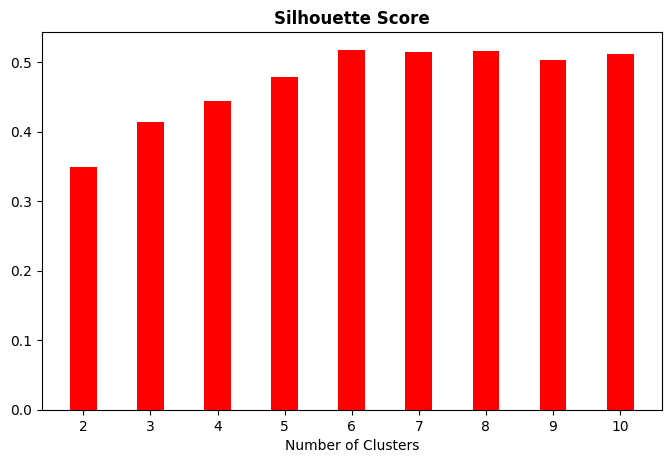

In [ ]:
plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='red', width=0.4)
plt.xticks(range(len(silhouette_scores)), list(parameters))
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')

From above plot ,we can see the best silhouette score if for k=6 in pca

In [ ]:
# fitting KMeans    
kmeans_pca = KMeans(n_clusters=6,random_state=11)
kmeans_pca.fit(pca_result)

KMeans(n_clusters=6, random_state=11)

In [ ]:
#fit predict kmeans 
kmeans_pca_df = pd.DataFrame(pca_result,columns=['PC1','PC2','PC3'],index=names_cor_df.index)
pred_pca = kmeans_pca.fit_predict(pca_result)
kmeans_pca_df["label"] = pred_pca

Text(0.5, 0, 'PC3')

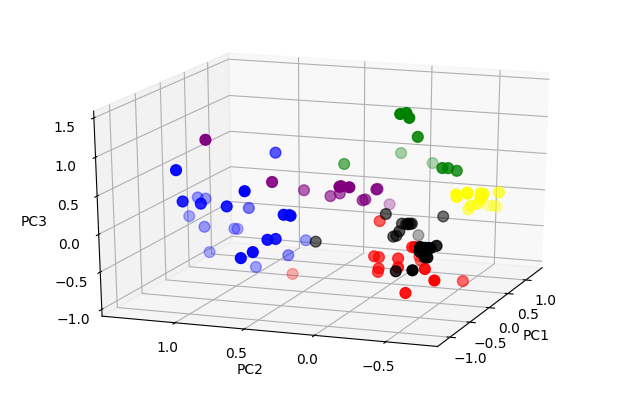

In [ ]:
#plotting 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(kmeans_pca_df.PC1[kmeans_pca_df["label"] == 0], kmeans_pca_df.PC2[kmeans_pca_df["label"] == 0], kmeans_pca_df.PC3[kmeans_pca_df["label"] == 0], c='purple', s=60)
ax.scatter(kmeans_pca_df.PC1[kmeans_pca_df["label"] == 1], kmeans_pca_df.PC2[kmeans_pca_df["label"] == 1], kmeans_pca_df.PC3[kmeans_pca_df["label"] == 1], c='red', s=60)
ax.scatter(kmeans_pca_df.PC1[kmeans_pca_df["label"] == 2], kmeans_pca_df.PC2[kmeans_pca_df["label"] == 2], kmeans_pca_df.PC3[kmeans_pca_df["label"] == 2], c='blue', s=60)
ax.scatter(kmeans_pca_df.PC1[kmeans_pca_df["label"] == 3], kmeans_pca_df.PC2[kmeans_pca_df["label"] == 3], kmeans_pca_df.PC3[kmeans_pca_df["label"] == 3], c='green', s=60)
ax.scatter(kmeans_pca_df.PC1[kmeans_pca_df["label"]== 4], kmeans_pca_df.PC2[kmeans_pca_df["label"] == 4], kmeans_pca_df.PC3[kmeans_pca_df["label"] == 4], c='yellow', s=60)
ax.scatter(kmeans_pca_df.PC1[kmeans_pca_df["label"]== 5], kmeans_pca_df.PC2[kmeans_pca_df["label"] == 5], kmeans_pca_df.PC3[kmeans_pca_df["label"] == 5], c='black', s=60)
ax.view_init(20, 200)
plt.xlabel("PC1")
plt.ylabel("PC2")
ax.set_zlabel('PC3')
     

In [ ]:
#let's merge the labels to the original dataset and explore
kmeans_pca_df.head(5)

,,PC1,PC2,PC3,label
Index,Name,,,,
0,Beyond Flavours,-0.885802,0.659062,-0.330774,2
1,Paradise,-0.858827,-0.606427,-0.020201,5
2,Flechazo,0.188425,-0.003711,-0.117551,1
3,Shah Ghouse Hotel & Restaurant,-0.920252,-0.614631,-0.036904,5
4,Over The Moon Brew Company,-0.650457,0.704754,0.463712,2


**Cluster Exploration**

**Let us consider for Cluster 0**

In [ ]:
#joining the cluster labels to names dataframe
names_cor_df = names_cor_df.join(kmeans_pca_df['label'])

In [ ]:
names_cor_df

,,Cost,Collections,Chinese,North Indian,Continental,Andhra,Arabian,Asian,Bakery,Beverages,...,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food,Total Cuisines,Avg Rating,label
Index,Name,,,,,,,,,,,,,,,,,,,,,
0,Beyond Flavours,800.0,0,1,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,6,4.28,2
1,Paradise,800.0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,4.70,5
2,Flechazo,1300.0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,4,4.66,1
3,Shah Ghouse Hotel & Restaurant,800.0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,5,3.21,5
4,Over The Moon Brew Company,1200.0,0,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,5,4.34,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,IndiBlaze,600.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0.00,0
101,Sweet Basket,200.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,2,0.00,4
102,Angaara Counts 3,500.0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0.00,5


In [ ]:
#cluster cuisines
def cluster_cuisines(df,cluster):
  pop_cuisines_df = pd.DataFrame()
  pop_cuisines_df['Cuisines'] = cuisines1
  pop_cuisines_df['Total Restaurants'] = [df[i].sum() for i in cuisines1]
  #visualizing cuisines
  sns.barplot(x='Total Restaurants', y='Cuisines',data=pop_cuisines_df)
  plt.title(f'The Most Popular Cuisines in {cluster}',size=10)

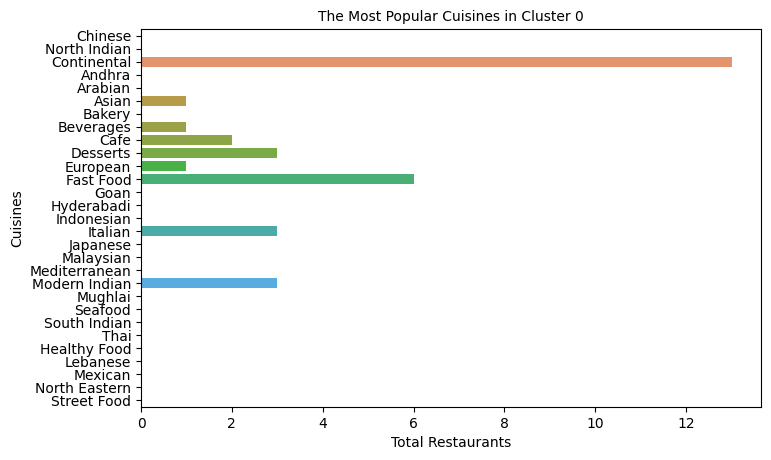

In [ ]:
#visualizing cuisines in cluster 0
cluster_cuisines(names_cor_df[names_cor_df['label']==0],'Cluster 0')

In [ ]:
names_cor_df[names_cor_df['label']==0].describe()

,Cost,Total Cuisines,Avg Rating,label
count,13.000000,13.000000,13.000000,13.0
mean,942.307692,2.538462,3.429798,0.0
std,625.115374,1.198289,1.159394,0.0
min,400.000000,1.000000,0.000000,0.0
25%,500.000000,2.000000,3.095000,0.0
50%,600.000000,3.000000,3.610000,0.0
75%,1200.000000,3.000000,3.974026,0.0
max,2500.000000,5.000000,4.810000,0.0


Cluster 0 Observation:

The restaurants in cluster 0 have mostly continental and fast foods.

The average rating is 3.42 and the average cost is 942 INR which includes an outlier of cost 2500 INR and median cost of 600 INR. 

This means the restaurants are basically cheap in nature in this cluster beside one.

**Let us consider for Cluster 1**

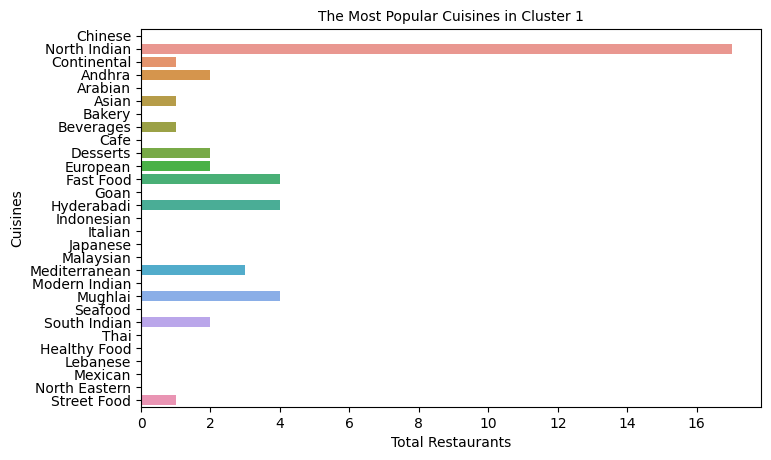

In [ ]:
#visualizing cuisines in cluster 1
cluster_cuisines(names_cor_df[names_cor_df['label']==1],'Cluster 1')

In [ ]:
names_cor_df[names_cor_df['label']==1].describe()

,Cost,Total Cuisines,Avg Rating,label
count,17.000000,17.000000,17.000000,17.0
mean,823.529412,2.588235,3.633235,1.0
std,363.626546,1.003670,0.624402,0.0
min,400.000000,1.000000,2.825000,1.0
25%,500.000000,2.000000,3.260000,1.0
50%,700.000000,3.000000,3.480000,1.0
75%,1100.000000,3.000000,3.800000,1.0
max,1500.000000,4.000000,4.880000,1.0


The restaurants in cluster 1 have mostly North Indian and other complementary foods available with them.

The average rating is 3.63 and the average cost is 823 INR. These restaurants are slightly cheaper in prices than cluster 0.

**Let us consider for Cluster 2**

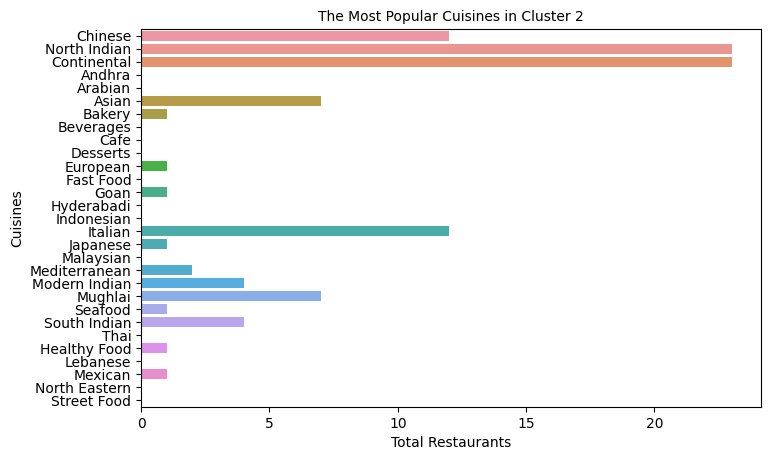

In [ ]:
#visualizing cuisines in cluster 1
cluster_cuisines(names_cor_df[names_cor_df['label']==2],'Cluster 2')

In [ ]:
names_cor_df[names_cor_df['label']==2].describe()

,Cost,Total Cuisines,Avg Rating,label
count,24.000000,24.000000,24.000000,24.0
mean,1331.250000,4.208333,3.776667,2.0
std,487.186354,1.020621,0.421660,0.0
min,500.000000,2.000000,3.190000,2.0
25%,1000.000000,3.750000,3.400000,2.0
50%,1250.000000,4.000000,3.807500,2.0
75%,1525.000000,5.000000,4.196250,2.0
max,2800.000000,6.000000,4.600000,2.0


The restaurants in cluster 2 have all the popular cuisines available with them including North Indian, Chinese and Continental.

The average rating is 3.77 which is better than the other two clusters and the average cost is 1331 INR. These restaurants are fine dining restaurants.

**Let us consider for Cluster 3**

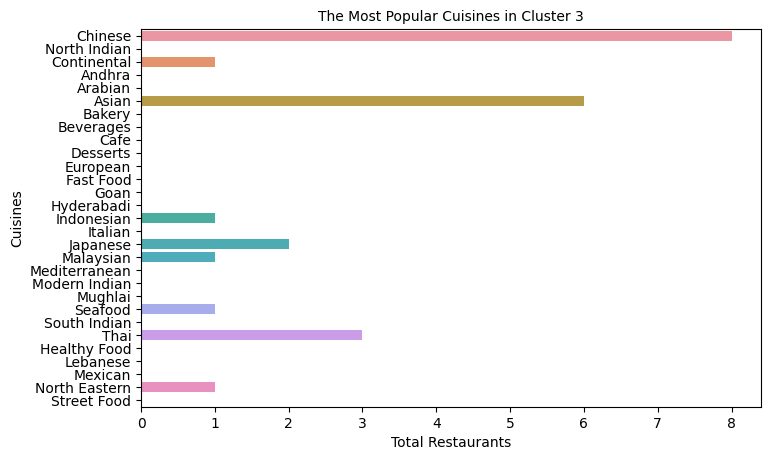

In [ ]:
#visualizing cuisines in cluster 1
cluster_cuisines(names_cor_df[names_cor_df['label']==3],'Cluster 3')

In [ ]:
names_cor_df[names_cor_df['label']==3].describe()

,Cost,Total Cuisines,Avg Rating,label
count,10.000000,10.000000,10.000000,10.0
mean,890.000000,2.400000,3.185000,3.0
std,532.186266,1.173788,1.219617,0.0
min,200.000000,1.000000,0.000000,3.0
25%,600.000000,2.000000,3.137500,3.0
50%,825.000000,2.000000,3.635000,3.0
75%,1075.000000,3.500000,3.706250,3.0
max,1750.000000,4.000000,4.450000,3.0


The restaurants in cluster 3 have all exotic cuisines available with them including Chinese, Thai, Asian, Seafood among others.

The average rating is 3.18 probably because these cuisines aren't that popular with the majority of the people in Hyderabad and the average cost is 890 INR.

**Let us consider for Cluster 4**

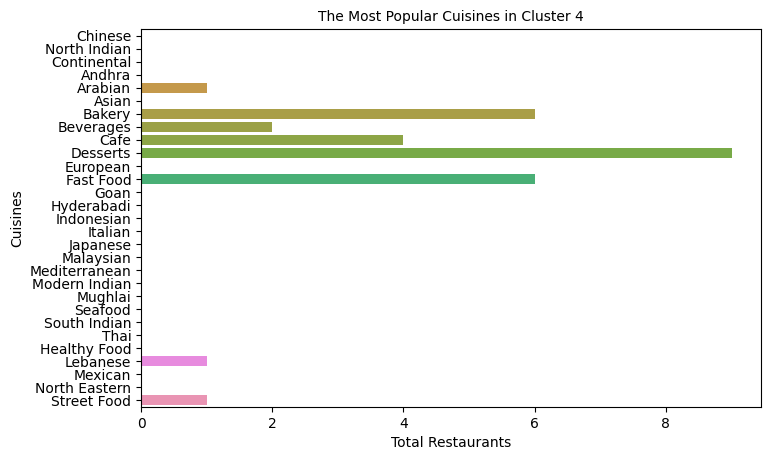

In [ ]:
#visualizing cuisines in cluster 1
cluster_cuisines(names_cor_df[names_cor_df['label']==4],'Cluster 4')

In [ ]:
names_cor_df[names_cor_df['label']==4].describe()

,Cost,Total Cuisines,Avg Rating,label
count,16.000000,16.000000,16.000000,16.0
mean,406.250000,1.875000,3.146518,4.0
std,240.052078,0.806226,1.275203,0.0
min,150.000000,1.000000,0.000000,4.0
25%,200.000000,1.000000,3.087500,4.0
50%,350.000000,2.000000,3.667500,4.0
75%,600.000000,2.250000,3.846250,4.0
max,1000.000000,3.000000,3.965000,4.0


The restaurants in cluster 4 are basically small food joints, bakeries and cafes.

The average rating is 3.14 and the average cost is 406 INR.

**Let us consider for Cluster 5**

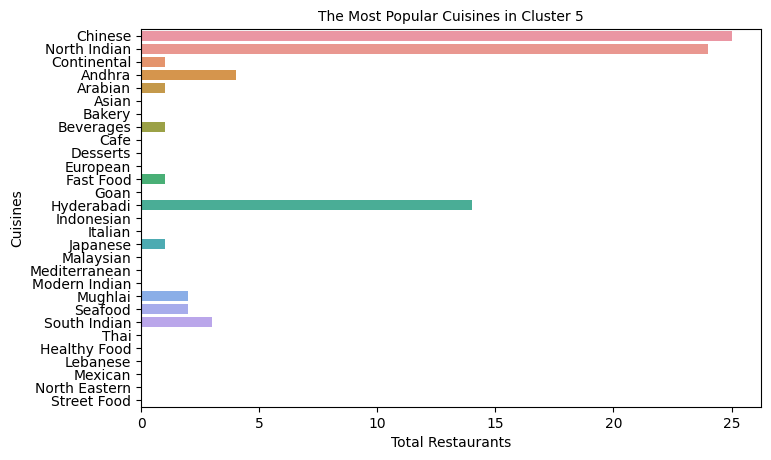

In [ ]:
#visualizing cuisines in cluster 1
cluster_cuisines(names_cor_df[names_cor_df['label']==5],'Cluster 5')

In [ ]:
names_cor_df[names_cor_df['label']==5].describe()

,Cost,Total Cuisines,Avg Rating,label
count,25.000000,25.00000,25.000000,25.0
mean,674.000000,3.16000,3.240249,5.0
std,272.381473,0.85049,0.834899,0.0
min,400.000000,2.00000,0.000000,5.0
25%,500.000000,3.00000,2.975000,5.0
50%,600.000000,3.00000,3.290000,5.0
75%,750.000000,4.00000,3.690000,5.0
max,1500.000000,5.00000,4.700000,5.0


The restaurants in cluster 5 have popular cuisines available with them including North Indian, Chinese and especially Hyderabad.

The average rating is 3.24 the average cost is 674 INR. These restaurants are casual dining restaurants with lower per person cost and rating than cluster 2.

# **Sentiment Analysis**

**EDA**

In [ ]:
#reviews data
senti_df = review_df.copy()
review_df.head(3)
     

,Restaurant,Reviewer,Review,Rating,Pictures,Reviews,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,0,1,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,0,3,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,0,2,3.0


Text(0.5, 1.0, 'Overall Rating Count')

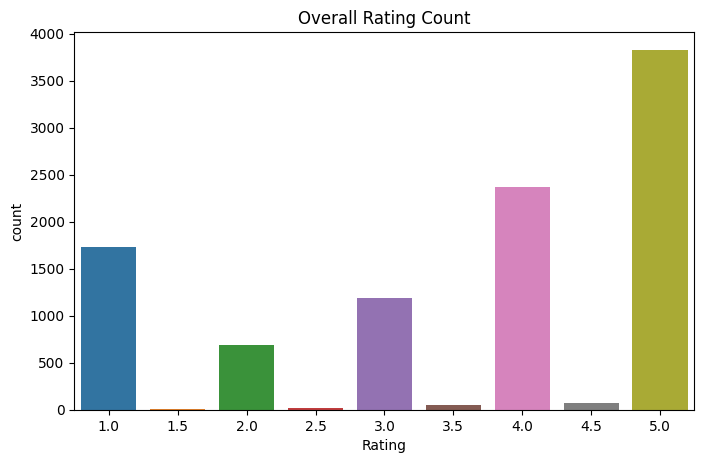

In [ ]:
sns.countplot(x=review_df['Rating'])
plt.title('Overall Rating Count')

Majority ratings are good, but we still have considerable count of poor ratings.

In [ ]:
#grouping reviewers with low rating and high reviews and followers
critics_df = review_df.groupby(['Reviewer','Reviews','Followers'])['Rating'].mean().reset_index().sort_values(by=['Rating','Reviews','Followers'],
            ascending=[True,False,False],ignore_index=True)
critics_df = critics_df[:30]
critics_df.head()

,Reviewer,Reviews,Followers,Rating
0,Sumit,401,2736.0,1.0
1,D.S,195,2079.0,1.0
2,Ram Raju.,115,282.0,1.0
3,Farhaan Nasir (bankruptfoodie),107,503.0,1.0
4,Suyash Dhandhania,92,495.0,1.0


**Text Pre-Processing and Text Visualization**

In [ ]:
#function to remove punctuation from the reviews
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with empty string, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
#applying remove punctuation to whole dataset
senti_df['Review'] = senti_df['Review'].apply(remove_punctuation)

In [ ]:
#removing stopwords and importing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# extracting the stopwords from nltk library
stopword = stopwords.words('english')

#creating a function to remove stopwords
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in stopword]
    # joining the list of words with space separator
    return " ".join(text)

senti_df['Review'] = senti_df['Review'].apply(remove_stopwords)

In [ ]:
#assigning ratings into positive, neutral and negative sentiments for visualization
senti_df['sentiment'] = senti_df['Rating'].apply(lambda rating : 1 if rating > 3.5 else (0 if 3 <= rating <= 3.5 else -1))

Text(0.5, 1.0, 'Number of Positive, Neutral and Negative Sentiments')

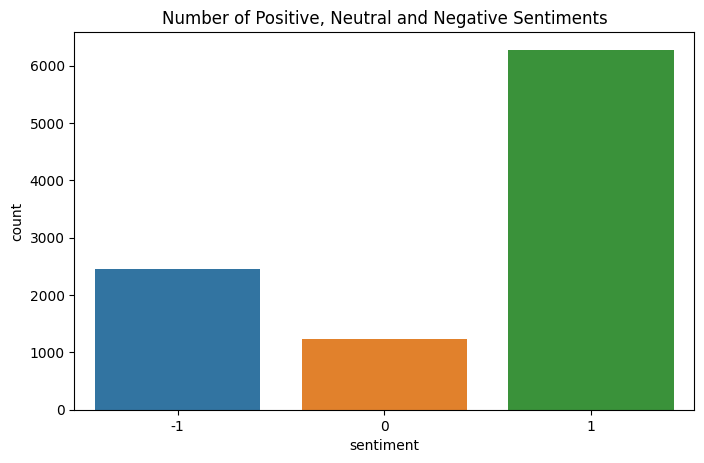

In [ ]:
#visualizing number of sentiments
sns.countplot(x=senti_df['sentiment'])
plt.title('Number of Positive, Neutral and Negative Sentiments',size=12)

Above plot we can observe that majority are positive even there is considerable amount of negative sentiments

In [ ]:
senti_df['sentiment'].value_counts()

 1    6269
-1    2447
 0    1239
Name: sentiment, dtype: int64

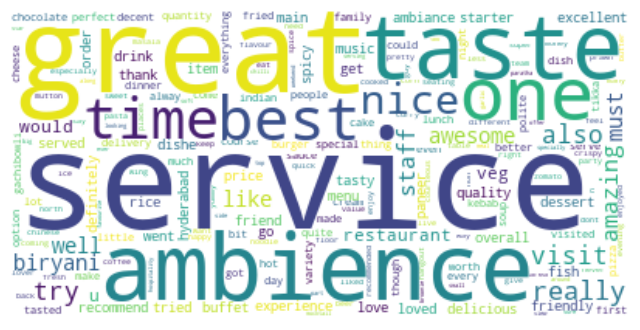

In [ ]:
#visualizing review text
#importing wordcloud
from wordcloud import WordCloud

#visualizing negative and positive reviews seperately
positive_reviews = senti_df[senti_df['sentiment'] == 1]
negative_reviews = senti_df[senti_df['sentiment'] == -1]

#since these words were in the overall wordcloud and doesn't contribute in distinguishing between neg and positive sentiments
stopword.extend(["food","good",'place','chicken','ordered']) 
#positive wordcloud
pos_text = " ".join(review for review in positive_reviews.Review)
pos_wordcloud = WordCloud(collocations = False, background_color = 'white',stopwords=stopword).generate(pos_text)
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

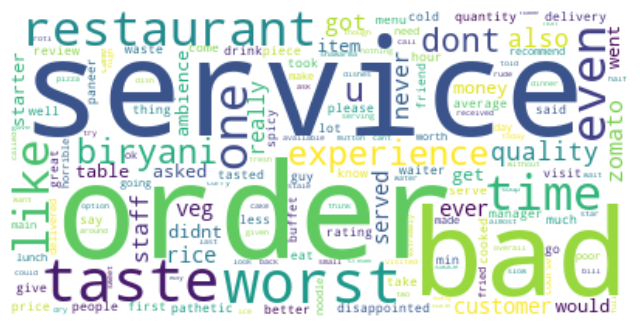

In [ ]:
#negative wordcloud
neg_text = " ".join(review for review in negative_reviews.Review)
neg_wordcloud = WordCloud(collocations = False, background_color = 'white',stopwords=stopword).generate(neg_text)
plt.imshow(neg_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

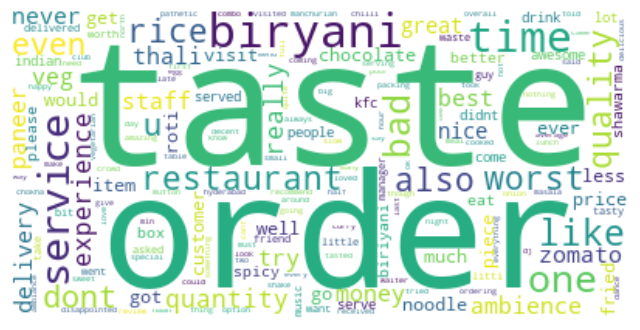

In [ ]:
#word cloud for restaurants in low ratings df
low_rating_reviews=senti_df.loc[senti_df['Restaurant'].isin(list(low_rating_df['Name']))]
rev_text = " ".join(review for review in low_rating_reviews.Review)
rev_wordcloud = WordCloud(collocations = False, background_color = 'white',stopwords=stopword).generate(rev_text)
plt.imshow(rev_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Looking at the words involved in the reviews of the restaurants with low ratings it can be understood that the customers didn't like the taste, good worst experience, or maybe the order packaging wasn't good. As earlier stated some of these restaurants had medium-ranged prices.

# **Modeling**

# **Random Forest**

In [ ]:
senti_df['sentiment'] = senti_df['Rating'].apply(lambda rating : 1 if rating > 3 else 0)

As we are assigning ratings into positive and negative sentiments i.e. it will be a binary problem

In [ ]:
#selecting features
senti_df['Index'] = list(range(0,len(senti_df)))
senti_df.set_index(['Index','Restaurant','Reviewer'],inplace=True)
senti_df = senti_df[['Review','sentiment']]

In feature selection we are selecting three features

In [ ]:
#import stemmer
from nltk.stem.snowball import SnowballStemmer
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

#applying stemmer
senti_df['Review'] = senti_df['Review'].apply(stemming)

**Train and Test splitting**

In [ ]:
#train test split
X = senti_df['Review']
y = senti_df['sentiment']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.2)

In [ ]:
#import tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
#tfidf vectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
#import
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#fitting
rf = RandomForestClassifier(random_state=45)
rf.fit(X_train_vec, y_train)
rf_score = rf.score(X_test_vec, y_test)
print("Results for Random Forest")
print(rf_score)
y_pred_rf = rf.predict(X_test_vec)
#Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)
#report
print(classification_report(y_test,y_pred_rf))
     

Results for Random Forest
0.8658965344048217
[[ 522  206]
 [  61 1202]]
              precision    recall  f1-score   support

           0       0.90      0.72      0.80       728
           1       0.85      0.95      0.90      1263

    accuracy                           0.87      1991
   macro avg       0.87      0.83      0.85      1991
weighted avg       0.87      0.87      0.86      1991



# **Logistic Regression**

In [ ]:
#import logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced',random_state=40)
lr.fit(X_train_vec, y_train)
lr_score = lr.score(X_test_vec, y_test)
print("Results for Logistic Regression")
print(lr_score)
y_pred_lr = lr.predict(X_test_vec)
#Confusion matrix
from sklearn.metrics import *
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)
#evaluation
print(classification_report(y_test,y_pred_lr))

Results for Logistic Regression
0.8653942742340532
[[ 621  107]
 [ 161 1102]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       728
           1       0.91      0.87      0.89      1263

    accuracy                           0.87      1991
   macro avg       0.85      0.86      0.86      1991
weighted avg       0.87      0.87      0.87      1991



# **KNN**

In [ ]:
#import logistic regression
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=6)
neigh.fit(X_train_vec, y_train)
neigh_score = neigh.score(X_test_vec, y_test)
print("Results for KNN ")
print(neigh_score)
y_pred_neigh = neigh.predict(X_test_vec)
#Confusion matrix
from sklearn.metrics import *
cm_neigh = confusion_matrix(y_test, y_pred_neigh)
print(cm_neigh)
#evaluation
print(classification_report(y_test,y_pred_neigh))

Results for KNN 
0.6499246609743847
[[ 138  590]
 [ 107 1156]]
              precision    recall  f1-score   support

           0       0.56      0.19      0.28       728
           1       0.66      0.92      0.77      1263

    accuracy                           0.65      1991
   macro avg       0.61      0.55      0.53      1991
weighted avg       0.63      0.65      0.59      1991



In the problem, predicting the negative sentiments correctly is really important but more important for the models is to reduce the number of false positives. 

False positives indicate that the reviews were actually negative but they were categorized as positive and this will lead to missing a complaint to work on.

Even though the number of false negatives is higher in the case of Logistic Regression than Random Forest and KNN, it is performing better in terms of reducing False positives. This indicates that Logistic Regression is penalizing False positives more just as we want.

# **Conclusion**

1.We can visulise AB's - Absolute Barbecues, B-Dubs, and 3B's - Buddies, Bar & Barbecue has the highest rating among top three in best resturants.

2.Cascade - Radisson Hyderabad Hitec City has the lowest in best resturants.

3.The most popular cuisines are the cuisines which most of the restaurants are willing to provide. The most popular cuisines in Hyderabad are North Indian, Chinese, Continental, and Hyderabad.

4.The restaurants in Hyderabad have a flexible per person. The cheapest is the food joint called Mohammedia Shawarma and the costliest restaurant is Collage - Hyatt Hyderabad Gachibowli.

**Cluster 0** - The restaurants in cluster 0 have mostly continental and fast foods available with them. The average rating is 3.42 and the average cost is 942 INR which includes an outlier of cost 2500 INR and a median cost of 600 INR. This means the restaurants are basically cheap in nature in this cluster beside one.

**Cluster 1** - The restaurants in cluster 1 have mostly North Indian and other complementary foods available with them. The average rating is 3.63 and the average cost is 823 INR. These restaurants are slightly higher in prices than cluster 0.

**Cluster 2** - The restaurants in cluster 2 have all the popular cuisines available with them including North Indian, Chinese and Complimentary.
The average rating is 3.77 which is better than the other two clusters and the average cost is 1331 INR. These restaurants are fine dining restaurants.

**Cluster 3** - The restaurants in cluster 3 have all exotic cuisines available with them including Chinese, Thai, Asian, Seafood among others. The average rating is 3.18 probably because these cuisines aren't that popular with the majority of the people in Hyderabad and the average cost is 890 INR. 

**Cluster 4** - The restaurants in cluster 4 are basically small food joints, bakeries, and cafes. The average rating is 3.14 and the average cost is 406 INR. - Cluster 5 - The restaurants in cluster 5 have popular cuisines available with them including North Indian, Chinese, and especially Hyderabadi. The average rating is 3.24 the average cost is 674 INR. These restaurants are casual dining restaurants with lower per-person costs and ratings than cluster 2.

# **Sentiment Analysis**

Sentiment Analysis was done on the reviews and a model was trained in order to predict the negative sentiments correctly is really important but more important for the models is to reduce the number of false positives.
False positives indicate that the reviews were actually negative but they were categorized as positive and this will lead to missing a complaint to work on.
Even though the number of false negatives is higher in the case of Logistic Regression than Random Forest and KNN, it is performing better in terms of reducing False positives. This indicates that Logistic Regression is penalizing False positives more just as we want.